In [1]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Load dataset
df = pd.read_csv('HR EMPLOYEE DATA SET.csv')

# Preview data
df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [20]:
# Step 2: Load the dataset
df = pd.read_csv('HR EMPLOYEE DATA SET.csv')

# Step 3: Check for nulls
print("Null values:\n", df.isnull().sum())

# Step 4: Encode target column 'Attrition'
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Step 5: One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Check shape
print("Encoded shape:", df_encoded.shape)


Null values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole        

In [21]:
# Step 6: Split into features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Evaluate the model
y_pred = model.predict(X_test)
print("Model accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [22]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("First few rows of X_train:")
print(X_train.head())

print("Target column unique values:", y_train.unique())


X_train shape: (1176, 47)
y_train shape: (1176,)
First few rows of X_train:
      Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
1097   24        350                21          2              1   
727    18        287                 5          2              1   
254    29       1247                20          2              1   
1175   39        492                12          3              1   
1341   31        311                20          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
1097            1551                        3          57               2   
727             1012                        2          73               3   
254              349                        4          45               3   
1175            1654                        4          66               3   
1341            1881                        2          89               3   

      JobLevel  ...  JobRole_Laboratory Technician  

In [24]:
# Check data types
print(X_train.dtypes[X_train.dtypes == 'object'])

# Optional: check for non-numeric types in test set too
print(X_test.dtypes[X_test.dtypes == 'object'])


Series([], dtype: object)
Series([], dtype: object)


In [27]:
print("X_test shape:", X_test.shape)
print("shap_values.shape:", shap_values.shape)  # If you're using SHAP v0.41+


X_test shape: (294, 47)
shap_values.shape: (294, 47, 2)


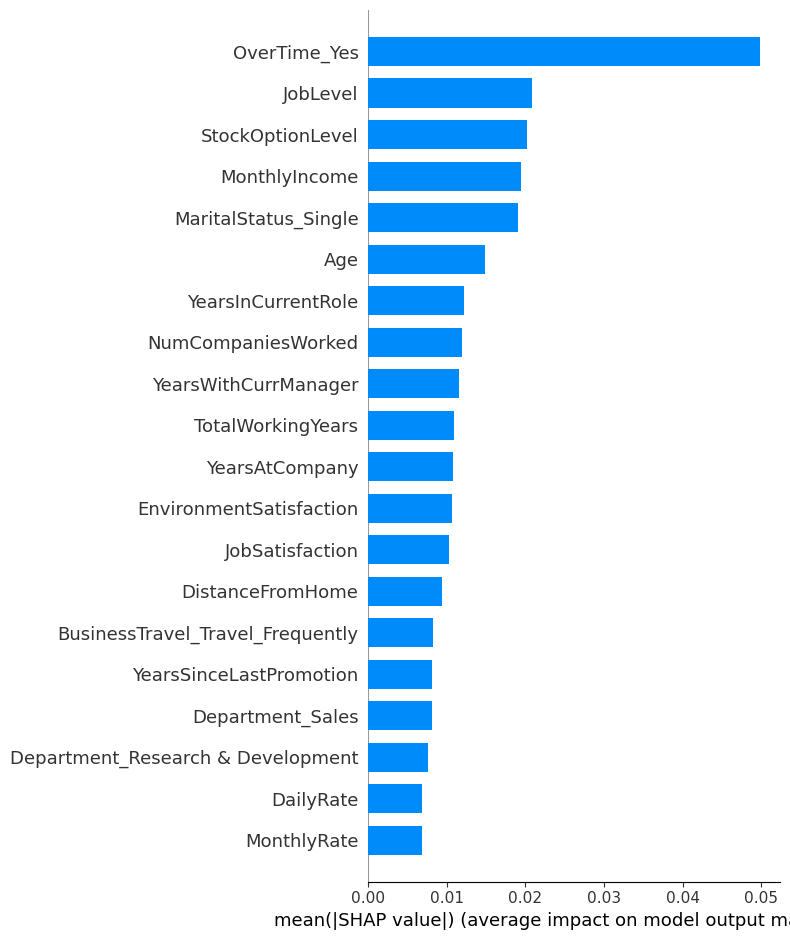

In [31]:
# Pick SHAP values for class 1 (Attrition = Yes)
shap_values_class1 = shap_values[..., 1]

# Plot bar and dot plots
shap.summary_plot(shap_values_class1, X_test, plot_type="bar")


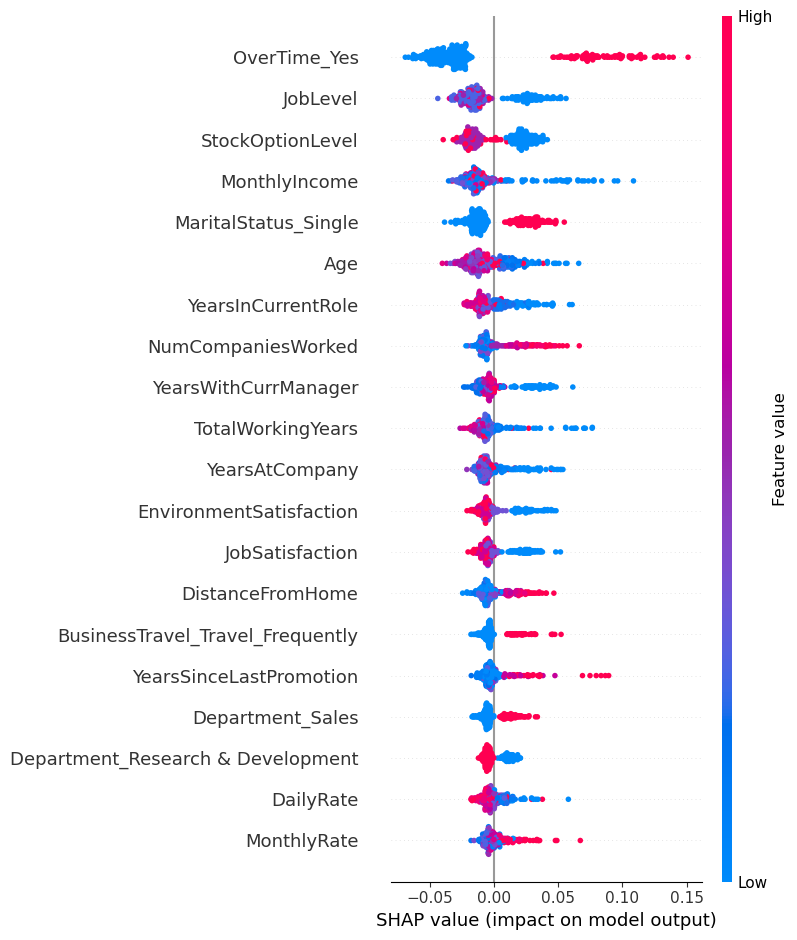

In [30]:
shap.summary_plot(shap_values_class1, X_test)

In [29]:
print(model.classes_)  # Should be [0 1] -> 1 = Attrition Yes


[0 1]


<Figure size 640x480 with 0 Axes>

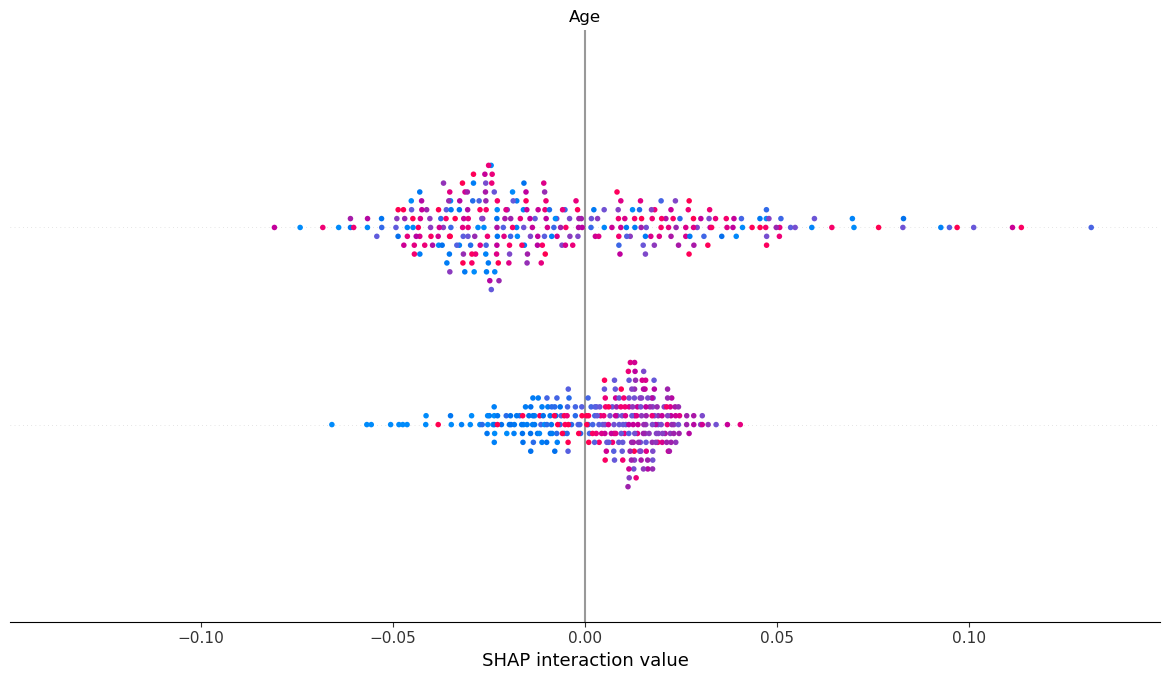

<Figure size 640x480 with 0 Axes>

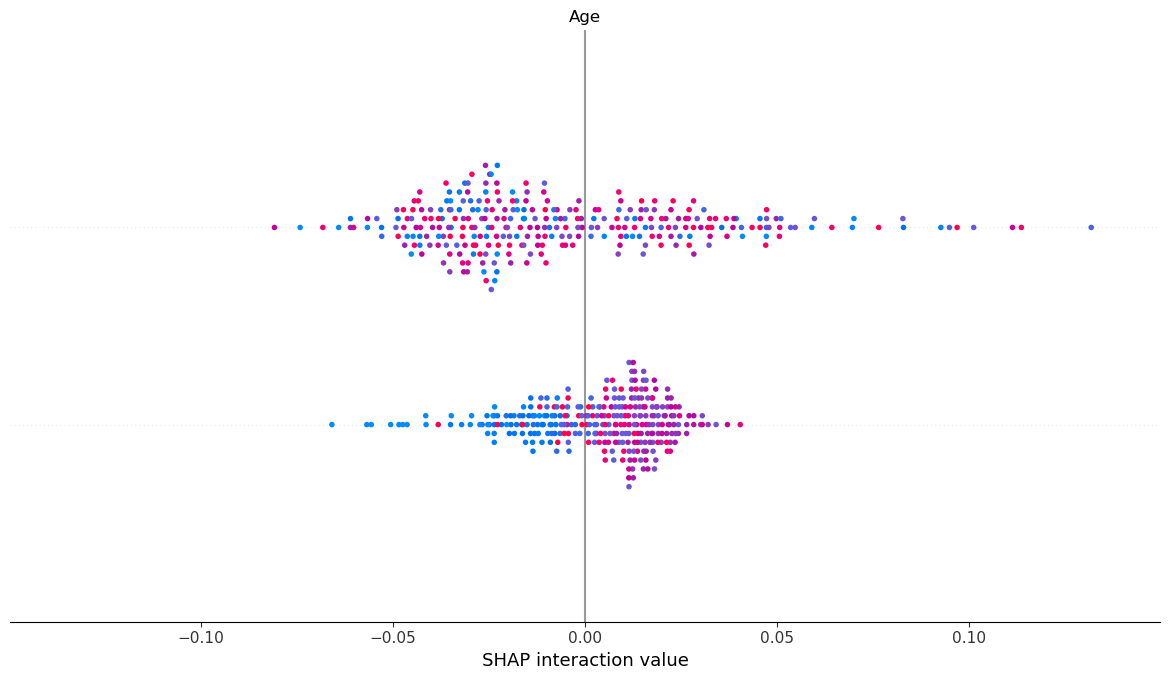

In [34]:
shap.summary_plot(shap_values, X_test, plot_type="bar")         # OK
shap.summary_plot(shap_values.values, X_test)                   # Also valid
